<a href="https://colab.research.google.com/github/Yoyo1505/Noriega-Zaldiavr-Jorge-Armando_INV_OPS/blob/main/NetworkX_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tutorial de Networkx**

Primero, descargamos las bibliotecas necesarias para realizar una explicación detallada y ejemplificada de sus funciones y aplicaciones que ofrece la libreria Networkx.

La biblioteca NetworkX es una herramienta que permite la creación, manipulación y análisis de redes complejas, tanto en su estructura como en su dinámica y funcionalidad. Es ampliamente utilizada en estudios de grafos, redes sociales, sistemas biológicos, entre otros.

La biblioteca yfinance se emplea para realizar análisis financieros básicos mediante la descarga de información de activos directamente desde Yahoo Finance. Una limitación importante es que, en ciertos horarios, Yahoo restringe el acceso a los datos. Como alternativa, se pueden utilizar otras bibliotecas como pandas_datareader (gratuita), backtrader (requiere clave API), quandl, entre otras.

NumPy es una biblioteca fundamental para cálculos numéricos. Ofrece funciones matemáticas avanzadas, herramientas de álgebra lineal, transformadas de Fourier, generación de números aleatorios y más.

Pandas está diseñada para la manipulación y análisis de datos estructurados. Proporciona estructuras eficientes como DataFrames y Series, ideales para trabajar con tablas, series temporales y grandes volúmenes de información.

Matplotlib es una biblioteca de visualización que permite crear gráficos estadísticos, esenciales para el análisis exploratorio de datos. Es compatible con múltiples estilos y formatos, lo que facilita la presentación de resultados de manera clara y profesional, al igual que seaborn.

Tabulate unicamente es para que los resultados de los datasets que contienen mucha información salgan organizados.

In [ ]:
!pip install networkx yfinance numpy pandas matplotlib seaborn tabulate typing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=97a077cb2bfbc31907493f1bbbfdf3a36ae35c63ca9600560837d2e1dea9969a
  Stored in directory: /root/.cache/pip/wheels/12/98/52/2bffe242a9a487f00886e43b8ed8dac46456702e11a0d6abef
Successfully built typing


Lo que sigue es importar las dependencias de las librerias. Esto es para tener acceso a todas las herramientas disponibles.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional

De acuerdo con su página oficial, la biblioteca NetworkX es útil para cargar y almacenar redes de datos estructurados o no estructurados. También permite construir conjuntos de datos y desarrollar algoritmos que facilitan el análisis de información compleja.

Como se mencionó al principio, aplicaremos la biblioteca NetworkX en un contexto de análisis financiero. El objetivo es crear una gráfica que visualice nodos representando activos financieros, donde las conexiones entre ellos reflejan la correlación entre sus precios. Esta visualización es especialmente útil para la optimización de portafolios y el análisis de riesgo, ya que permite identificar relaciones significativas entre activos y tomar decisiones.

Comenzaremos con las funciones básicas de la biblioteca NetworkX, y poco a poco construiremos un análisis financiero más completo.

Primero, creamos un grafo. Un grafo es una colección de nodos o vértices, junto con conexiones entre ellos llamadas aristas. En NetworkX, estos nodos pueden ser cualquier objeto o variable de Python: desde cadenas de texto, imágenes, números, hasta incluso otros grafos.

En la primera línea del código, asignamos un nombre a nuestro grafo; en este caso lo llamaremos simplemente "Grafo". Luego, definimos que este objeto proviene de la biblioteca networkx (abreviada como nx) y especificamos que queremos crear un grafo vacío.

En la segunda línea, incluimos una instrucción de salida para verificar que el grafo se ha creado correctamente. Esta salida nos mostrará información básica sobre el grafo, como el número de nodos y aristas que contiene en ese momento.

In [ ]:
N = nx.Graph()#Grafo vacio
print(N)#Salida

Graph with 0 nodes and 0 edges


En este caso solo nombramos un grafo sin conexiones, es decir, un grafo vacio, o sin información que conectar.

Ahora agreguemos un nodo o un punto. Recordemos que pueden ser cadenas de texto entonces agregamos el nombre de la empresas, de la forma en que aparece en el mercado de valores.

#Nodos

In [ ]:
N.add_node("PLTR")#Agregamos el nodo
print(N)#Salida del nodo

Graph with 1 nodes and 0 edges


Ahora agregaremos mas nodos

In [ ]:
N.add_node("SNAP")
N.add_node("SOUN")
N.add_node("WBD")
N.add_node("BBD")

Como podemos ver esto es algo largo y cansado entonces usando la función .add_nodes_from() podemos agregar varios nodos simultaneamente.

In [ ]:
N.add_nodes_from((["JPM", "GOOGL", "TSLA", "NVDA", "BRK-B","META", "F", "CAT", "XOM", "CWAN", "FYBR"]))
print(N)

Graph with 16 nodes and 0 edges


Podemos agregarle atributos o caracteristicas dentro de los nodos con la misma función

In [ ]:
N.add_nodes_from([("RIVN",{"Sector Financiero":"Industria de Automoviles"})])
print(N.nodes(data=True))

[('PLTR', {}), ('SNAP', {}), ('SOUN', {}), ('WBD', {}), ('BBD', {}), ('JPM', {}), ('GOOGL', {}), ('TSLA', {}), ('NVDA', {}), ('BRK-B', {}), ('META', {}), ('F', {}), ('CAT', {}), ('XOM', {}), ('CWAN', {}), ('FYBR', {}), ('RIVN', {'Sector Financiero': 'Industria de Automoviles'})]


Como podemos ver, el atributo aparece en el orden adecuado. Sin embargo para fines del ejemplo mantendremos las cosas simples y lo haremos sin atributos.
Entonces solo eliminaremos el ultimo nodo con la funcion .remove_nodes_from()

In [ ]:
N.remove_nodes_from(["RIVN"])
print(N.nodes(data=True))
#Nota tambien podemos elimiar nodos por caracteristica con la misma función

[('PLTR', {}), ('SNAP', {}), ('SOUN', {}), ('WBD', {}), ('BBD', {}), ('JPM', {}), ('GOOGL', {}), ('TSLA', {}), ('NVDA', {}), ('BRK-B', {}), ('META', {}), ('F', {}), ('CAT', {}), ('XOM', {}), ('CWAN', {}), ('FYBR', {})]


Tambien podemos borras todos los nodos del grafo con la funcion .clear()

In [ ]:
N.clear()
print(N)

Graph with 0 nodes and 0 edges


Volvemos a agregar los nodos nuevamente

In [ ]:
N.add_nodes_from((["PLTR","SNAP","SOUN","WBD","BBD","JPM", "GOOGL", "TSLA", "NVDA", "BRK-B","META", "F", "CAT", "XOM", "CWAN", "FYBR"]))
print(N)

Graph with 16 nodes and 0 edges


#Edges

 Podemos agregar conexiones o aristas entre los nodos. Estas conexiones son conocidos como "edge". Y los agregamos con la función .add_edge o si queremos agregar varias conexiones al mismo tiempo usamos la función .add_edges_from

In [ ]:
#Conexiones individuales
N.add_edge("JPM", "GOOGL")
N.add_edge("TSLA", "NVDA")
N.add_edge("BRK-B", "CAT")
#Conexiones multiples
N.add_edges_from([("META", "GOOGL"),("F", "XOM"),("CWAN", "FYBR"),("JPM", "BRK-B"),("TSLA", "META")])
print(N)

Graph with 16 nodes and 8 edges


Ahora creamos un grafo nuevo. Este grafo nos ayudara a entender el orden de los nodos y las conexiones.

In [ ]:
DG=nx.DiGraph()

Con la funcion .DiGraph, creamos un grafo dirigido. En este tipo de grafo, las conexiones (aristas)  tienen dirección, es decir, una relación entre A y B no es la misma que entre B y A.

Al nuevo grafo le agregamos nuevas conexiones.

In [ ]:
DG.add_edge("GOOGL", "JPM")
DG.add_edge("JPM", "TSLA")
DG.add_edge("GOOGL", "NVDA")
DG.add_edge("JPM", "GOOGL")

Mostramos los nodos y las aristas del grafo dirigido.
list(DG.edges) convierte las aristas a una lista explícita.
DG.successors(nodo) muestra todos los nodos a los que un nodo específico tiene una flecha saliente.

In [ ]:
print("Grafo dirigido:")
print("Nodos:", DG.nodes())
print("Aristas:", list(DG.edges))
print("Sucesores de GOOGL:", list(DG.successors("GOOGL")))

Grafo dirigido:
Nodos: ['GOOGL', 'JPM', 'TSLA', 'NVDA']
Aristas: [('GOOGL', 'JPM'), ('GOOGL', 'NVDA'), ('JPM', 'TSLA'), ('JPM', 'GOOGL')]
Sucesores de GOOGL: ['JPM', 'NVDA']


Estas líneas verifican que el grafo dirigido tiene exactamente los sucesores y aristas esperadas.
Si la condición no se cumple, Python lanzará un error.

In [ ]:
assert list(DG.successors("GOOGL")) == ["JPM", "NVDA"]
assert list(DG.edges) == [("GOOGL", "JPM"), ("GOOGL", "NVDA"), ("JPM", "TSLA"), ("JPM", "GOOGL")]

#Analisis de los elementos de un grafo

En esta sección se describe como podemos visualizar la información dentro de nuestro grafo, en caso de que queramos un nodo en especifico.

In [ ]:
print("Lista de nodos en el grafo")
list(N.nodes)

Lista de nodos en el grafo


['PLTR',
 'SNAP',
 'SOUN',
 'WBD',
 'BBD',
 'JPM',
 'GOOGL',
 'TSLA',
 'NVDA',
 'BRK-B',
 'META',
 'F',
 'CAT',
 'XOM',
 'CWAN',
 'FYBR']

In [ ]:
print("Lista de conexiones en el grafo")
list(N.edges)

Lista de conexiones en el grafo


[('JPM', 'GOOGL'),
 ('JPM', 'BRK-B'),
 ('GOOGL', 'META'),
 ('TSLA', 'NVDA'),
 ('TSLA', 'META'),
 ('BRK-B', 'CAT'),
 ('F', 'XOM'),
 ('CWAN', 'FYBR')]

In [ ]:
print("Conexiones con el nodo TSLA")
list(N.neighbors("TSLA"))

Conexiones con el nodo TSLA


['NVDA', 'META']

Creamos una nueva grafica ahora con valores númericos que bien podrian representar algunos precios o valuaciones. Y se la adjuntamos al grafo dirigido que ya teniamos.

In [ ]:
DG.add_edges_from([("GOOGL","JPM"),("TSLA","BRK-B"),("XOM","BBD")])
DG2=nx.DiGraph(DG)
list(DG2.edges())

[('GOOGL', 'JPM'),
 ('GOOGL', 'NVDA'),
 ('JPM', 'TSLA'),
 ('JPM', 'GOOGL'),
 ('TSLA', 'BRK-B'),
 ('XOM', 'BBD')]

Por último haremos un resumen con el ejemplo completo.

=== Creando grafo de ejemplo ===
Nodos: ['A', 'B', 'C', 'D', 'E']
Aristas: [('A', 'B', {'weight': 1.0, 'type': 'strong'}), ('A', 'E', {'weight': 0.7}), ('A', 'D', {'weight': 0.3}), ('B', 'C', {'weight': 0.8}), ('C', 'D', {'weight': 0.5}), ('D', 'E', {'weight': 1.2})]

=== Visualizando grafo ===


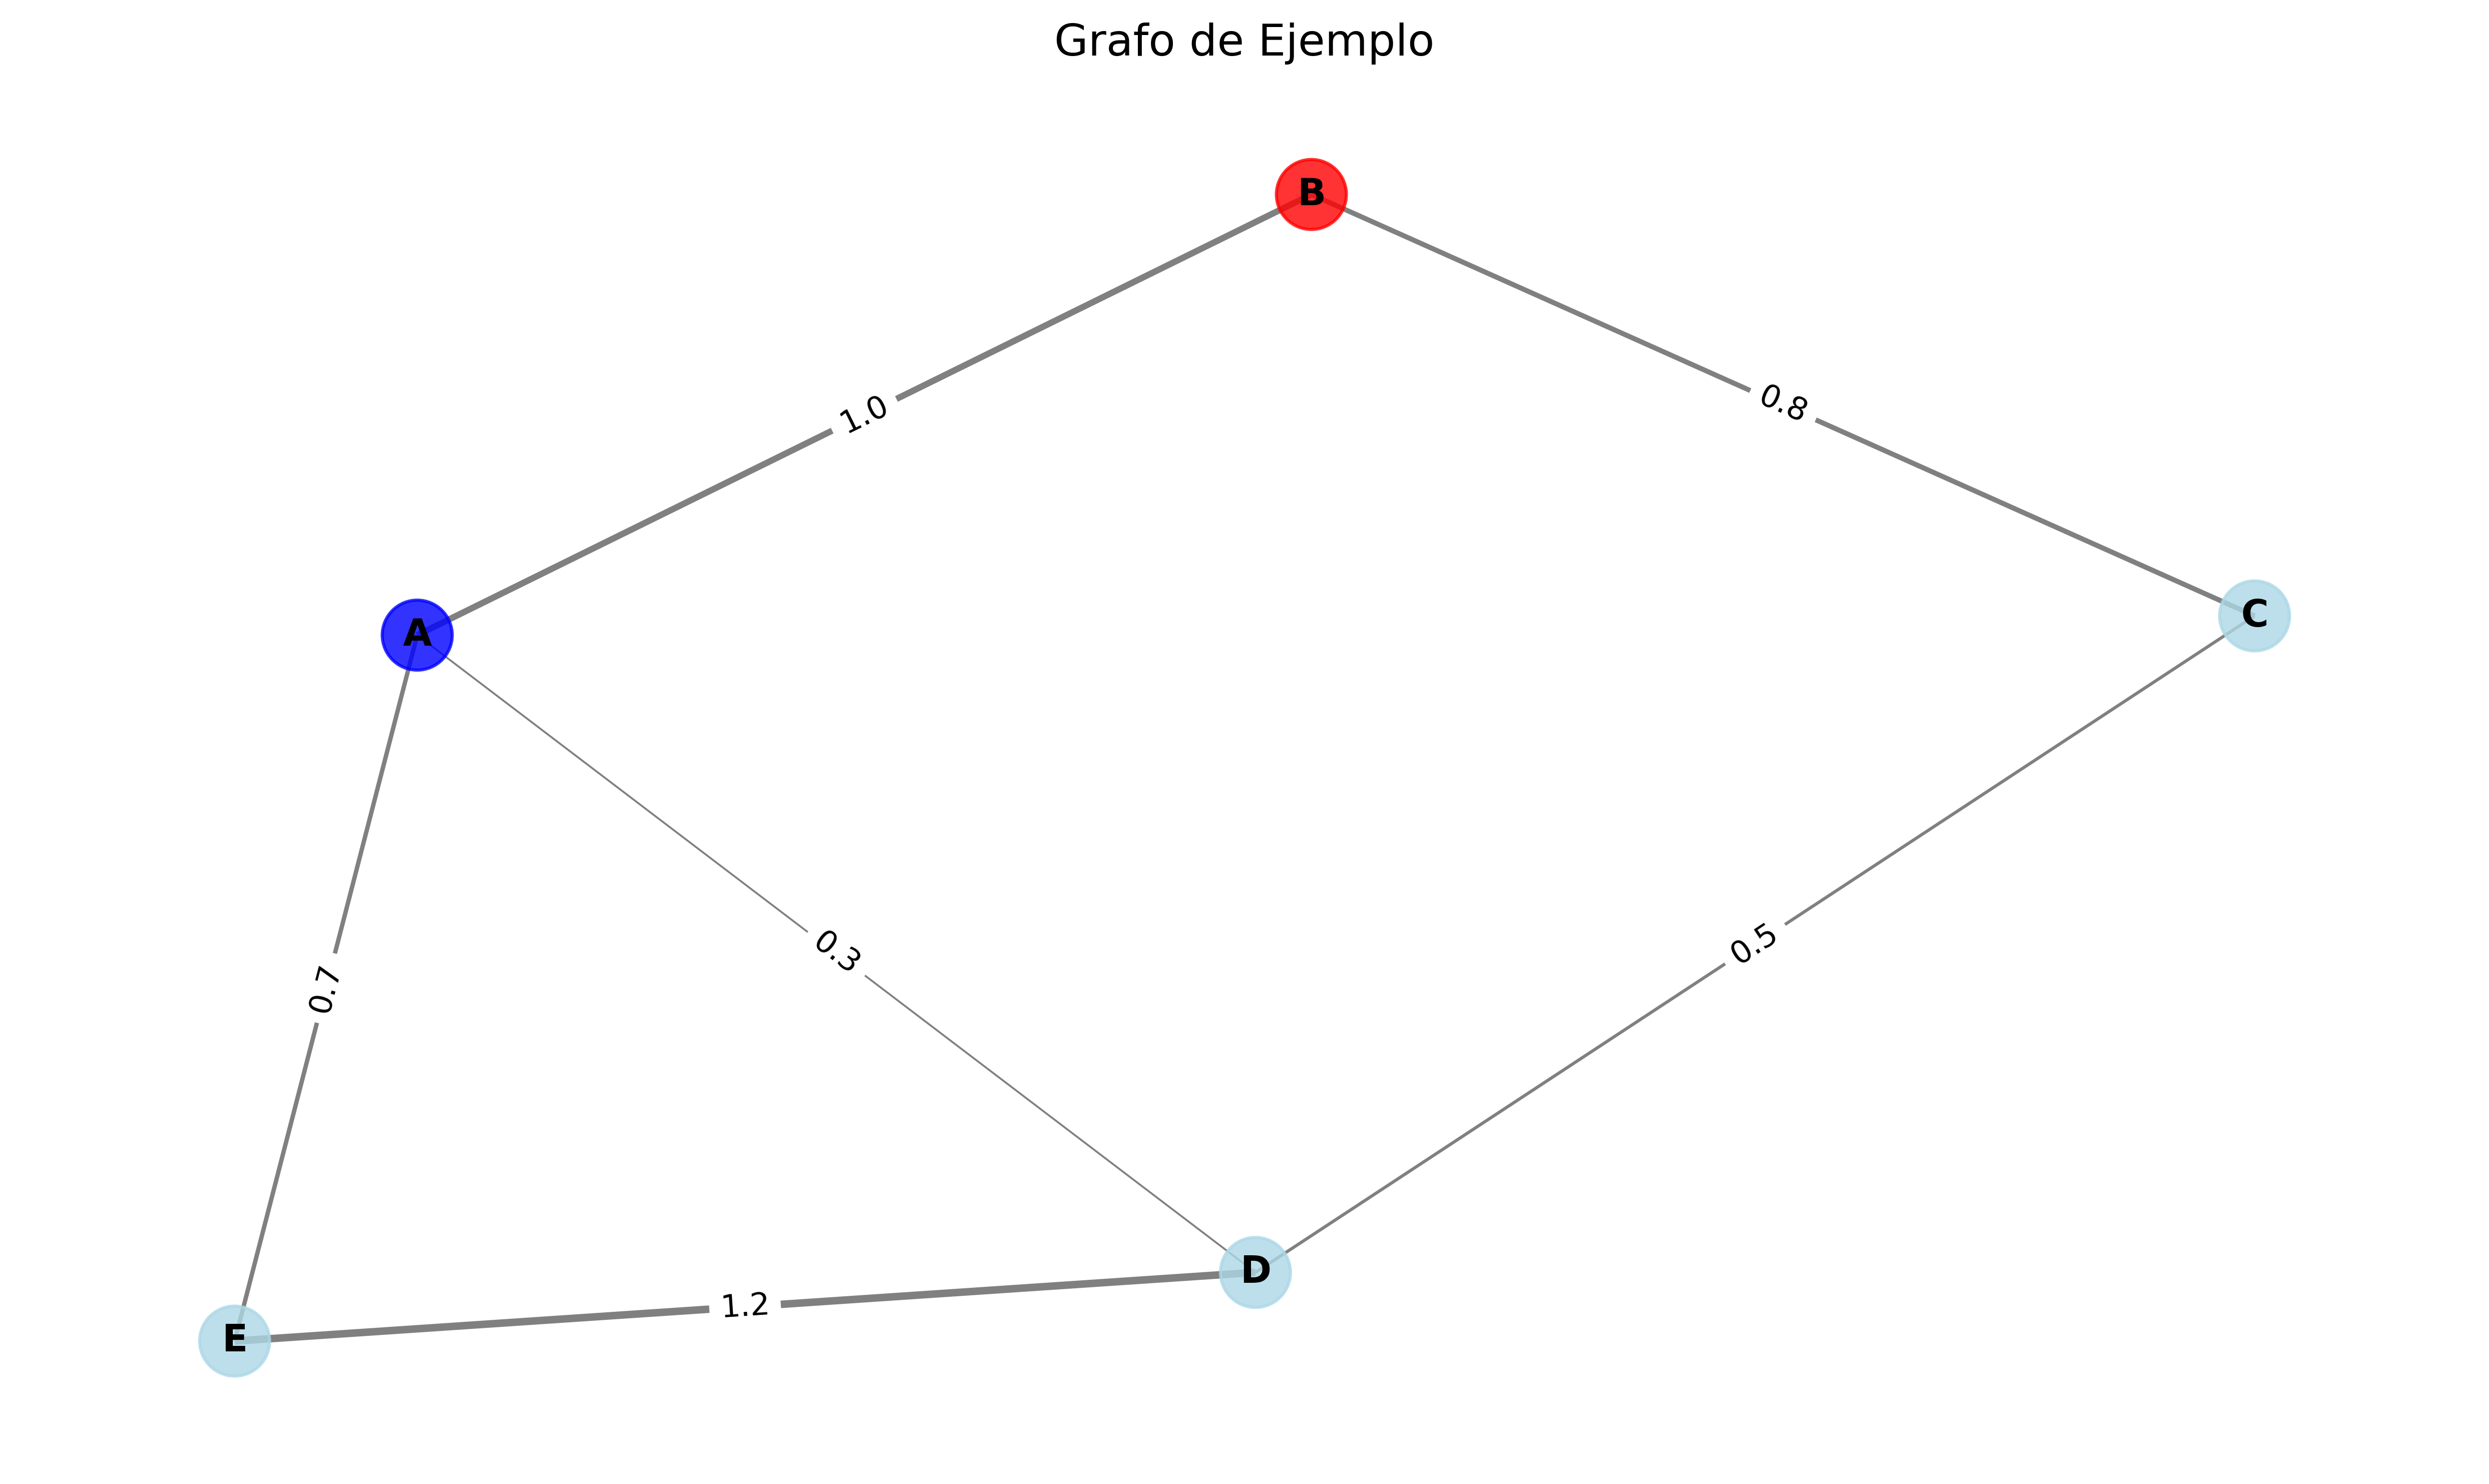


=== Analizando métricas del grafo ===

=== Análisis del Grafo ===
Número de nodos: 5
Número de aristas: 6

Grado de los nodos:
  A: 3
  B: 2
  C: 2
  D: 3
  E: 2

Centralidad de grado:
  A: 0.750
  B: 0.500
  C: 0.500
  D: 0.750
  E: 0.500

Camino más corto de A a E (ponderado por peso): ['A', 'E']
Longitud del camino más corto: 0.7


In [ ]:
#Función para crear un grafo de ejemplo
def create_sample_graph() -> nx.Graph:

    # Inicializar un grafo no dirigido
    G = nx.Graph()

    # Añadir nodos (representan puntos en el grafo)
    nodes = ["A", "B", "C", "D", "E"]
    G.add_nodes_from(nodes)

    # Añadir aristas con pesos (conexiones entre nodos con un valor de peso)
    edges = [
        ("A", "B", 1.0),  # Arista de A a B con peso 1.0
        ("B", "C", 0.8),  # Arista de B a C con peso 0.8
        ("C", "D", 0.5),  # Arista de C a D con peso 0.5
        ("D", "E", 1.2),  # Arista de D a E con peso 1.2
        ("E", "A", 0.7),  # Arista de E a A con peso 0.7
        ("A", "D", 0.3),  # Arista de A a D con peso 0.3
    ]
    G.add_weighted_edges_from(edges)

    # Añadir colores a los nodos para personalizar la visualización
    for node in G.nodes():
        G.nodes[node]["color"] = "lightblue"  # Color por defecto
    G.nodes["A"]["color"] = "blue"  # Color especial para el nodo A
    G.nodes["B"]["color"] = "red"   # Color especial para el nodo B

    # Añadir un atributo adicional a una arista específica
    G.edges["A", "B"]["type"] = "strong"

    return G

# Función para visualizar el grafo
def visualize_graph(G: nx.Graph, title: str = "Grafo") -> None:

    # Crear una nueva figura para la visualización
    plt.figure(figsize=(14, 8),dpi=450)

    # Usar un layout de resorte para posicionar los nodos
    pos = nx.spring_layout(G)

    # Obtener los colores de los nodos desde los atributos
    node_colors = [G.nodes[node].get("color", "lightblue") for node in G.nodes()]

    # Obtener los grosores de las aristas basados en los pesos
    edge_widths = [G[u][v].get("weight", 1.0) * 2 for u, v in G.edges()]

    # Dibujar los nodos con sus colores y tamaño
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, alpha=0.8)

    # Dibujar las aristas con grosores proporcionales a los pesos
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray")

    # Añadir etiquetas a los nodos
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    # Añadir etiquetas de peso a las aristas
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Configurar el título y mostrar la gráfica
    plt.title(title, fontsize=14)
    plt.axis("off")  # Ocultar ejes para una visualización más limpia
    plt.show()

# --- Función para analizar métricas básicas del grafo ---
def analyze_graph(G: nx.Graph) -> Dict[str, any]:
    metrics = {}
    # Contar nodos y aristas
    metrics["num_nodes"] = G.number_of_nodes()
    metrics["num_edges"] = G.number_of_edges()
    # Calcular el grado de cada nodo (número de conexiones)
    metrics["degree"] = dict(G.degree())
    # Calcular la centralidad de grado (importancia relativa de los nodos)
    metrics["degree_centrality"] = nx.degree_centrality(G)
    return metrics

# --- Función para visualizar métricas
def print_metrics(metrics: Dict[str, any]) -> None:
    print("\n=== Análisis del Grafo ===")
    print(f"Número de nodos: {metrics['num_nodes']}")
    print(f"Número de aristas: {metrics['num_edges']}")
    print("\nGrado de los nodos:")
    for node, degree in metrics["degree"].items():
        print(f"  {node}: {degree}")
    print("\nCentralidad de grado:")
    for node, centrality in metrics["degree_centrality"].items():
        print(f"  {node}: {centrality:.3f}")

# --- Función principal ---
def main():

    # Crear un grafo de ejemplo
    print("=== Creando grafo de ejemplo ===")
    G = create_sample_graph()

    # Mostrar información básica del grafo
    print("Nodos:", G.nodes())
    print("Aristas:", G.edges(data=True))

    # Visualizar el grafo
    print("\n=== Visualizando grafo ===")
    visualize_graph(G, title="Grafo de Ejemplo")

    # Analizar y mostrar métricas
    print("\n=== Analizando métricas del grafo ===")
    metrics = analyze_graph(G)
    print_metrics(metrics)

    # Calcular y mostrar el camino más corto entre dos nodos
    try:
        path = nx.shortest_path(G, source="A", target="E", weight="weight")
        path_length = nx.shortest_path_length(G, source="A", target="E", weight="weight")
        print("\nCamino más corto de A a E (ponderado por peso):", path)
        print("Longitud del camino más corto:", path_length)
    except nx.NetworkXNoPath:
        print("\nNo hay camino entre A y E")

if __name__ == "__main__":
    main()

# Árbol de expanción mínima

Un árbol de expansión minima es una estructura que se extrae de un grafo convexo y ponderado, es decir es un conjunto de nodos o vertices que se conecta por aristas que tienen un peso asociado. El objetivo del árbol de conectar todos los nodos del grafo sin formar ciclos y minimizando el costo total de las conexiones.

Este concepto tiene aplicaciones prácticas en muchos campos:

- Diseño de redes: Como redes eléctricas, de agua, de telecomunicaciones o de transporte.

- Optimización de rutas: Por ejemplo, conectar sucursales de una empresa con el menor costo de infraestructura.

- Algoritmos de agrupamiento: En inteligencia artificial y análisis de datos, para formar grupos de elementos relacionados.

A continuación, haremos un ejemplo sencillo relacionado con la carreteras o las conexiones entre ciudades.


Carreteras construidas en el árbol de expansión mínima:
CDMX - Chihuahua (Costo: 2)
Chihuahua - Guadalajara (Costo: 3)
CDMX - Monterrey (Costo: 4)
Chihuahua - Acapulco (Costo: 7)

Costo total mínimo: 16
Aristas en el MST: [('A', 'C', {'weight': 2}), ('B', 'C', {'weight': 1}), ('B', 'D', {'weight': 5}), ('D', 'E', {'weight': 2})]


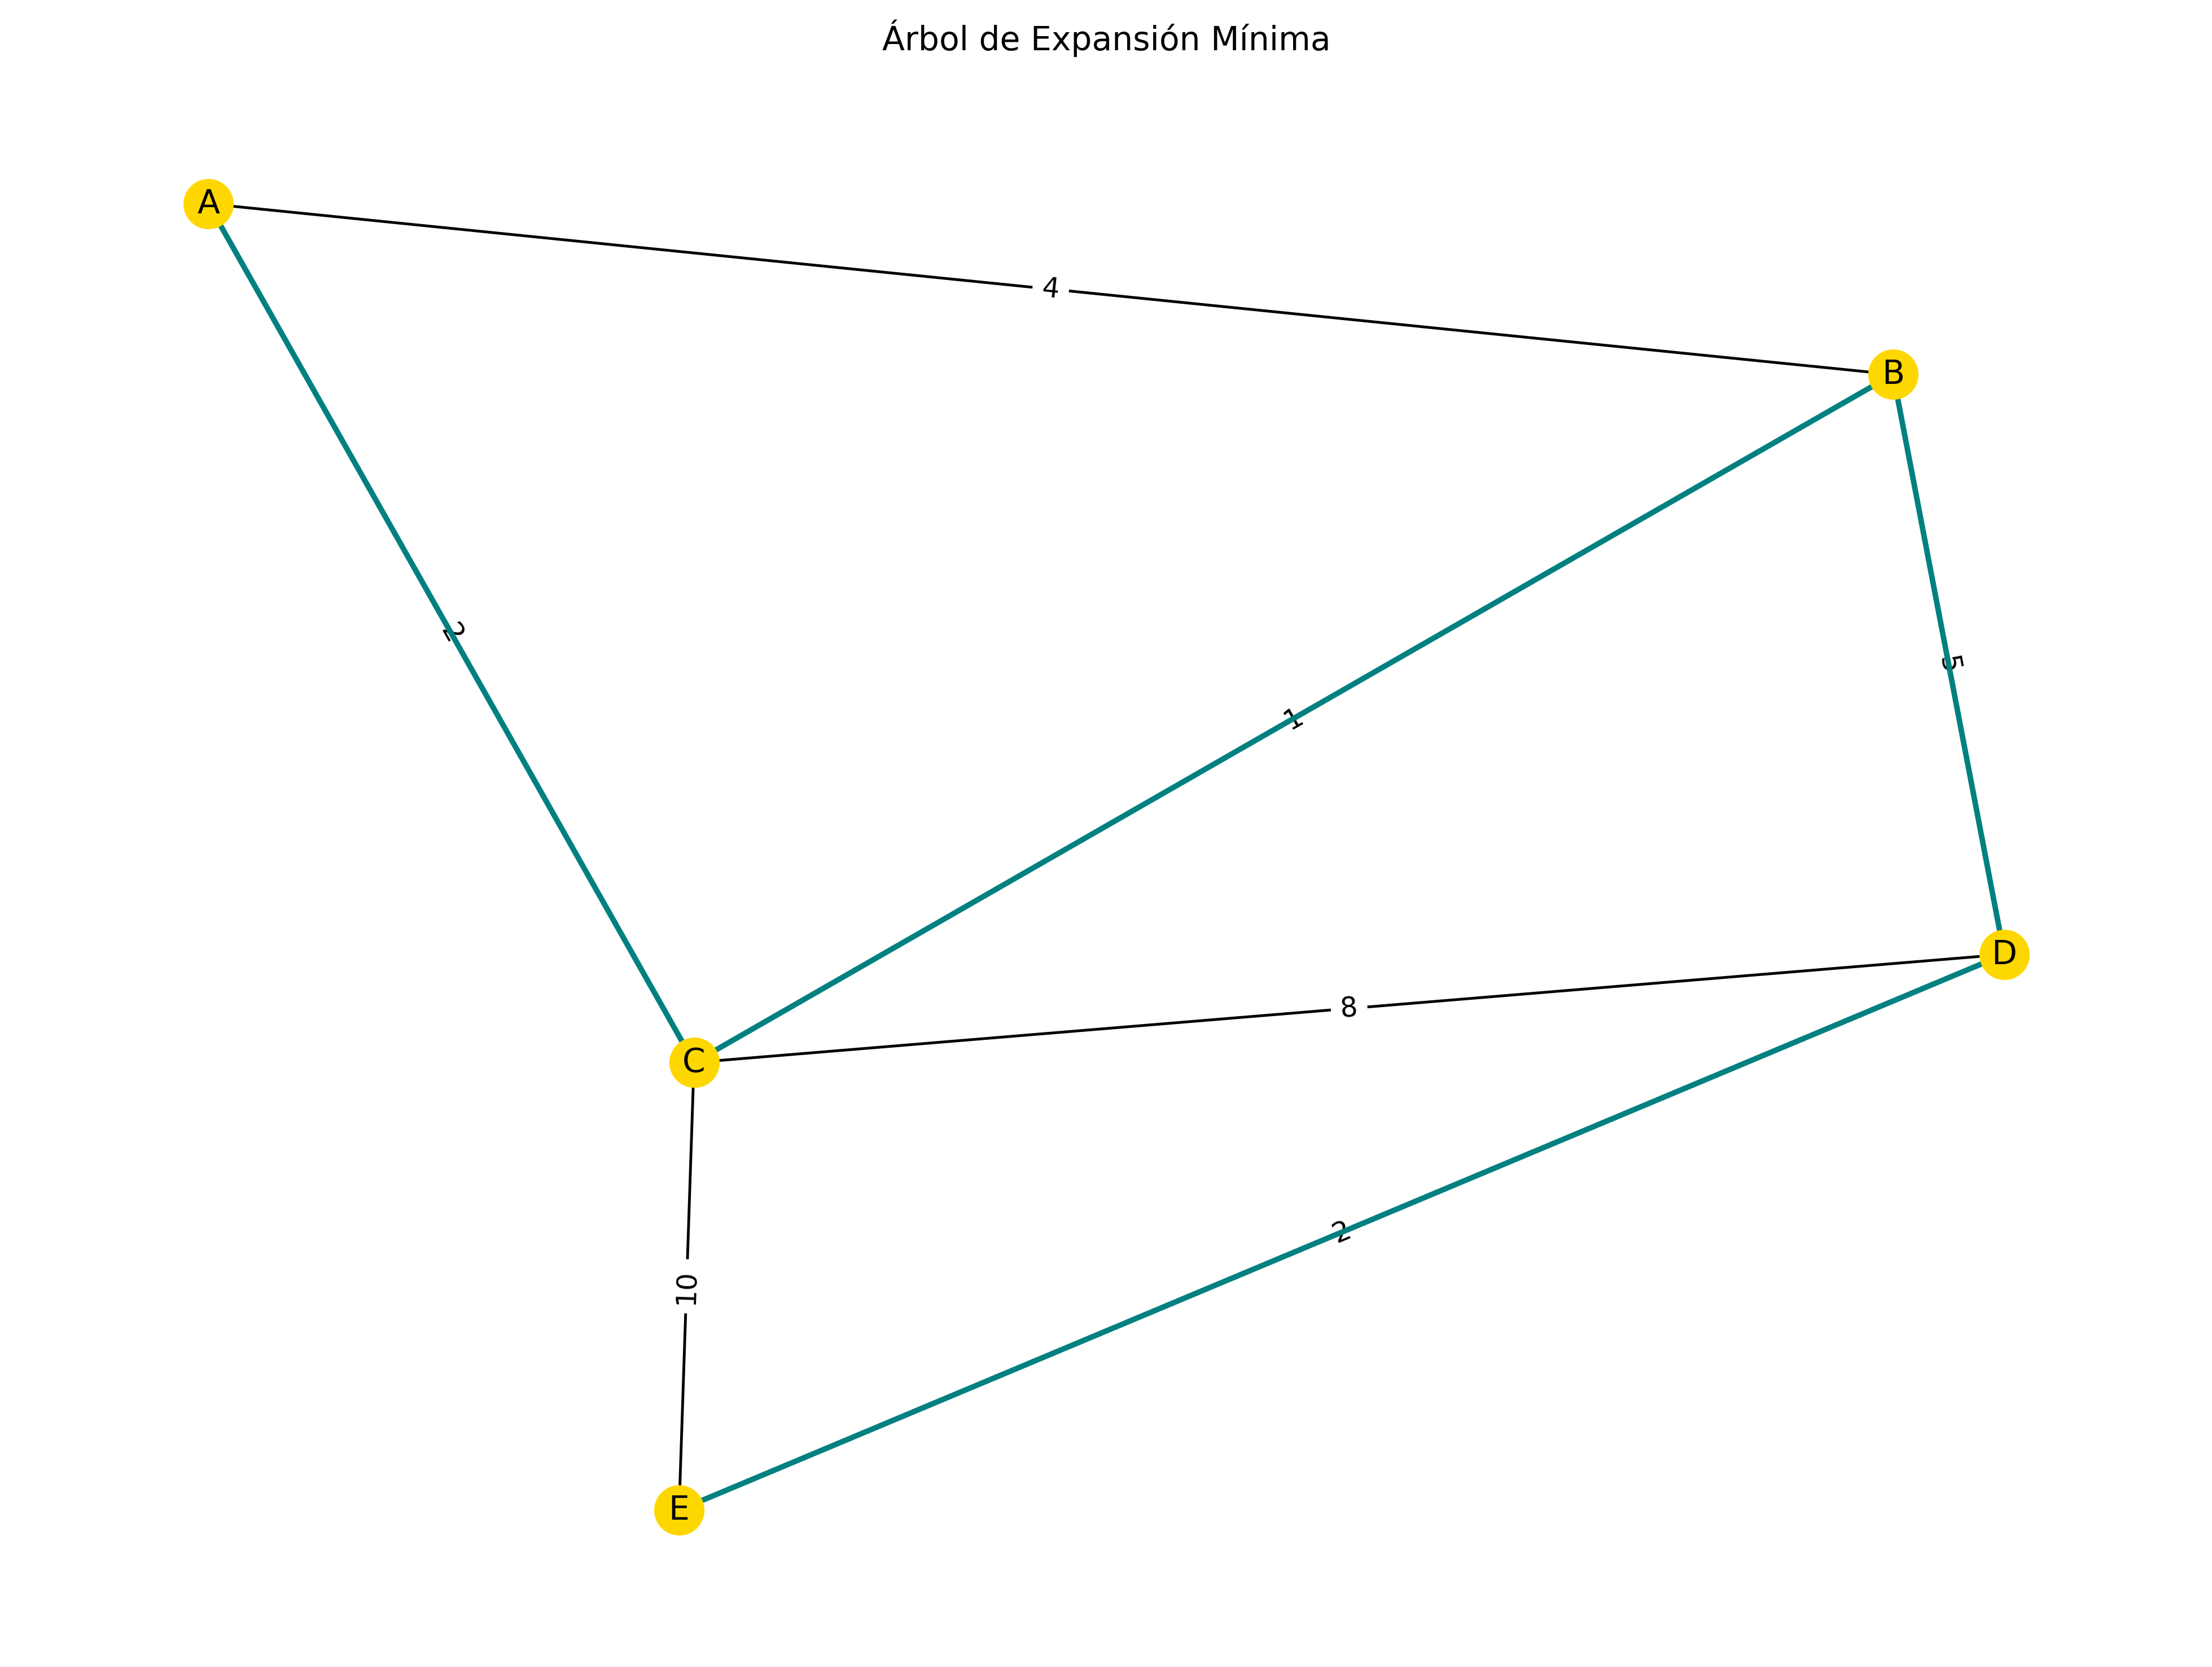

In [ ]:
# Lista de nombres de ciudades
ciudades = ["CDMX", "Monterrey", "Chihuahua", "Guadalajara", "Acapulco"]
# Lista de carreteras disponibles entre ciudades.
# Cada tupla representa: (costo, índice ciudad1, índice ciudad2)
carreteras = [
    (4, 0, 1),   # CDMX - Monterrey
    (2, 0, 2),   # CDMX - Chihuahua
    (5, 1, 2),   # Monterrey - Chihuahua
    (10, 1, 3),  # Monterrey - Guadalajara
    (3, 2, 3),   # Chihuahua - Guadalajara
    (7, 2, 4),   # Chihuahua - Acapulco
    (8, 3, 4)    # Guadalajara - Acapulco
]

# Cada ciudad comienza como su propio grupo (para verificar la exitencia de ciclos)
origen = list(range(len(ciudades)))

# Función para encontrar raíz del grupo de una ciudad
def encontrar(ciudad):
    while origen[ciudad] != ciudad:
        ciudad = origen[ciudad]  # Seguimos el camino hasta encontrar la raíz
    return ciudad

# Función para unir dos grupos si no están ya conectados
def unir(ciudad1, ciudad2):
    raiz1 = encontrar(ciudad1)
    raiz2 = encontrar(ciudad2)
    if raiz1 != raiz2:
        origen[raiz2] = raiz1  # Unimos los grupos
        return True  # Se pudo unir sin formar ciclo
    return False  # Ya estaban conectados, formarían ciclo

# Ordenamos las carreteras por costo ascendente
carreteras.sort()

# Variables para guardar el resultado final
total = 0  # Costo total del árbol de expansión mínima
resultado = []  # Lista de carreteras seleccionadas

# Recorremos las carreteras más baratas primero
for costo, c1, c2 in carreteras:
    if unir(c1, c2):  # Si no forma ciclo, la añadimos
        resultado.append((ciudades[c1], ciudades[c2], costo))
        total += costo  # Sumamos el costo

# Mostramos las carreteras seleccionadas
print("Carreteras construidas en el árbol de expansión mínima:")
for c1, c2, costo in resultado:
    print(f"{c1} - {c2} (Costo: {costo})")

# Mostramos el costo total mínimo
print(f"\nCosto total mínimo: {total}")

G = nx.Graph()
G.add_weighted_edges_from([
    ("A", "B", 4), ("A", "C", 2), ("B", "C", 1),
    ("B", "D", 5), ("C", "D", 8), ("C", "E", 10), ("D", "E", 2)
])

# Calcular MST
mst = nx.minimum_spanning_tree(G, weight='weight')
print("Aristas en el MST:", list(mst.edges(data=True)))

# Dibujar
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(11,8),dpi=350)
nx.draw(G, pos, with_labels=True, node_color="gold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,"weight"))
nx.draw_networkx_edges(G, pos, edgelist=mst.edges(), width=2, edge_color="teal")
plt.title("Árbol de Expansión Mínima")
plt.show()


#Rutas más cortas

Los algoritmos que ofrecen el conjunto de funciones para obtener el camino más corto entre dos nodos, las rutas desde una fuente a todos los nodos, y una función para graficar la ruta encontrada.

Ruta más corta entre CDMX y Acapulco:
CDMX -> Chihuahua -> Acapulco
Distancia total: 9
Ruta más corta de A a D: ['A', 'B', 'C', 'D']
Longitud: 4


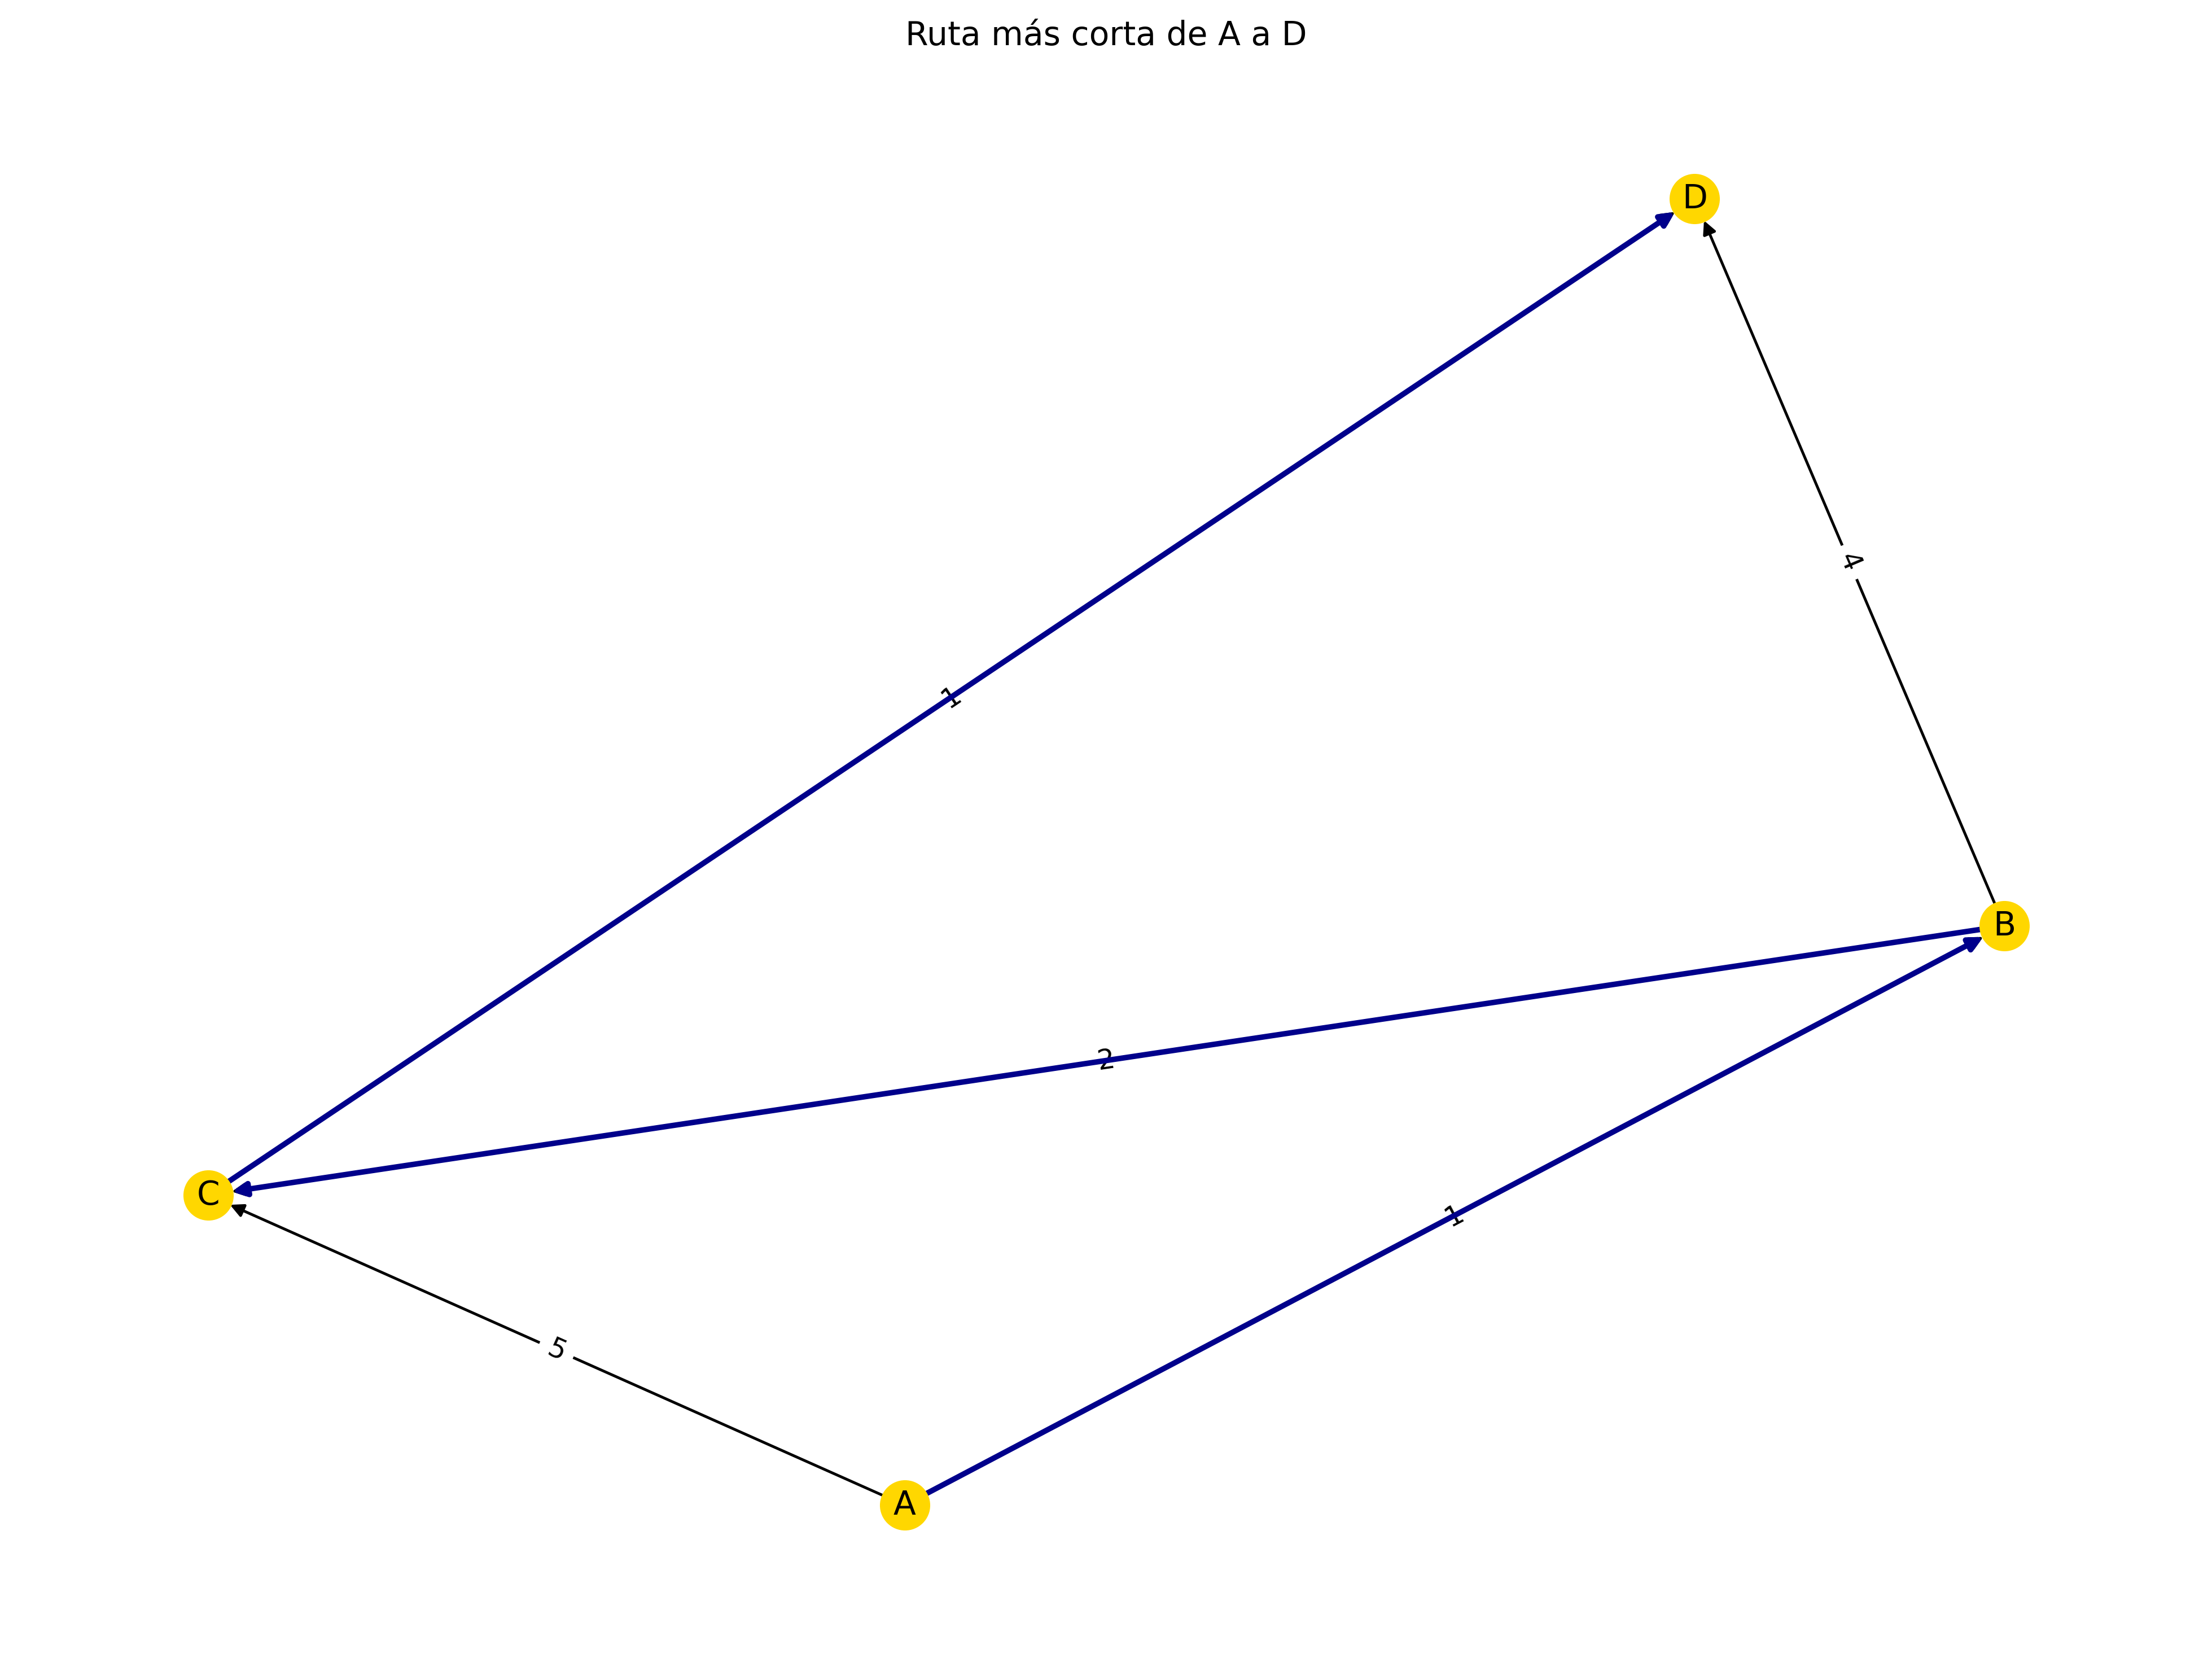

In [ ]:
# Representamos el grafo como lista.
grafo = {i: [] for i in range(len(ciudades))}
for costo, c1, c2 in carreteras:
    grafo[c1].append((c2, costo))
    grafo[c2].append((c1, costo))  # no dirigido

# Dijkstra sin librerías
import heapq

def dijkstra(inicio):
    dist = [float("inf")] * len(ciudades)
    dist[inicio] = 0
    prev = [-1] * len(ciudades)
    pq = [(0, inicio)]
    while pq:
        d, nodo = heapq.heappop(pq)
        if d > dist[nodo]:
            continue
        for vecino, peso in grafo[nodo]:
            if dist[vecino] > dist[nodo] + peso:
                dist[vecino] = dist[nodo] + peso
                prev[vecino] = nodo
                heapq.heappush(pq, (dist[vecino], vecino))
    return dist, prev

inicio, fin = 0, 4  # CDMX -> Acapulco
distancias, padres = dijkstra(inicio)

# Reconstruir el camino
camino = []
nodo = fin
while nodo != -1:
    camino.append(ciudades[nodo])
    nodo = padres[nodo]
camino.reverse()

print(f"Ruta más corta entre {ciudades[inicio]} y {ciudades[fin]}:")
print(" -> ".join(camino))
print("Distancia total:", distancias[fin])

DG = nx.DiGraph()
DG.add_weighted_edges_from([
    ("A", "B", 1), ("A", "C", 5), ("B", "C", 2), ("B", "D", 4), ("C", "D", 1)
])

# Ruta más corta
path = nx.shortest_path(DG, source="A", target="D", weight="weight")
length = nx.shortest_path_length(DG, source="A", target="D", weight="weight")
print("Ruta más corta de A a D:", path)
print("Longitud:", length)

# Dibujar
pos = nx.spring_layout(DG, seed=42)
plt.figure(figsize=(11,8),dpi=350)
nx.draw(DG, pos, with_labels=True, node_color="gold")
nx.draw_networkx_edge_labels(DG, pos, edge_labels=nx.get_edge_attributes(DG,"weight"))
nx.draw_networkx_edges(DG, pos, edgelist=list(zip(path[:-1], path[1:])), width=2, edge_color="darkblue")
plt.title("Ruta más corta de A a D")
plt.show()


#Flujo máximo y flujo de costo mínimo.
Se utilizan para modelar y resolver problemas donde se transporta algo (como agua, datos, mercancías o dinero) a través de una red con ciertas restricciones. **El flujo máximo** busca la mayor cantidad de flujo que puede enviarse desde un nodo origen a un nodo destino en una red , sin exceder el número de las aristas (canales). Cada arista tiene una capacidad máxima, y el objetivo es encontrar cómo distribuir el flujo para que llegue la mayor cantidad posible al destino. El **flujo de costo mínimo** también busca enviar una cantidad de flujo desde el origen al destino, pero minimizando el costo total asociado al transporte. Aquí, cada arista tiene no solo una capacidad, sino también un costo por unidad de flujo. El objetivo es encontrar la forma más barata de enviar una cantidad específica de flujo.

Flujo máximo de CDMX a Acapulco: 22
Flujo total enviado: 0
Costo total mínimo: 0


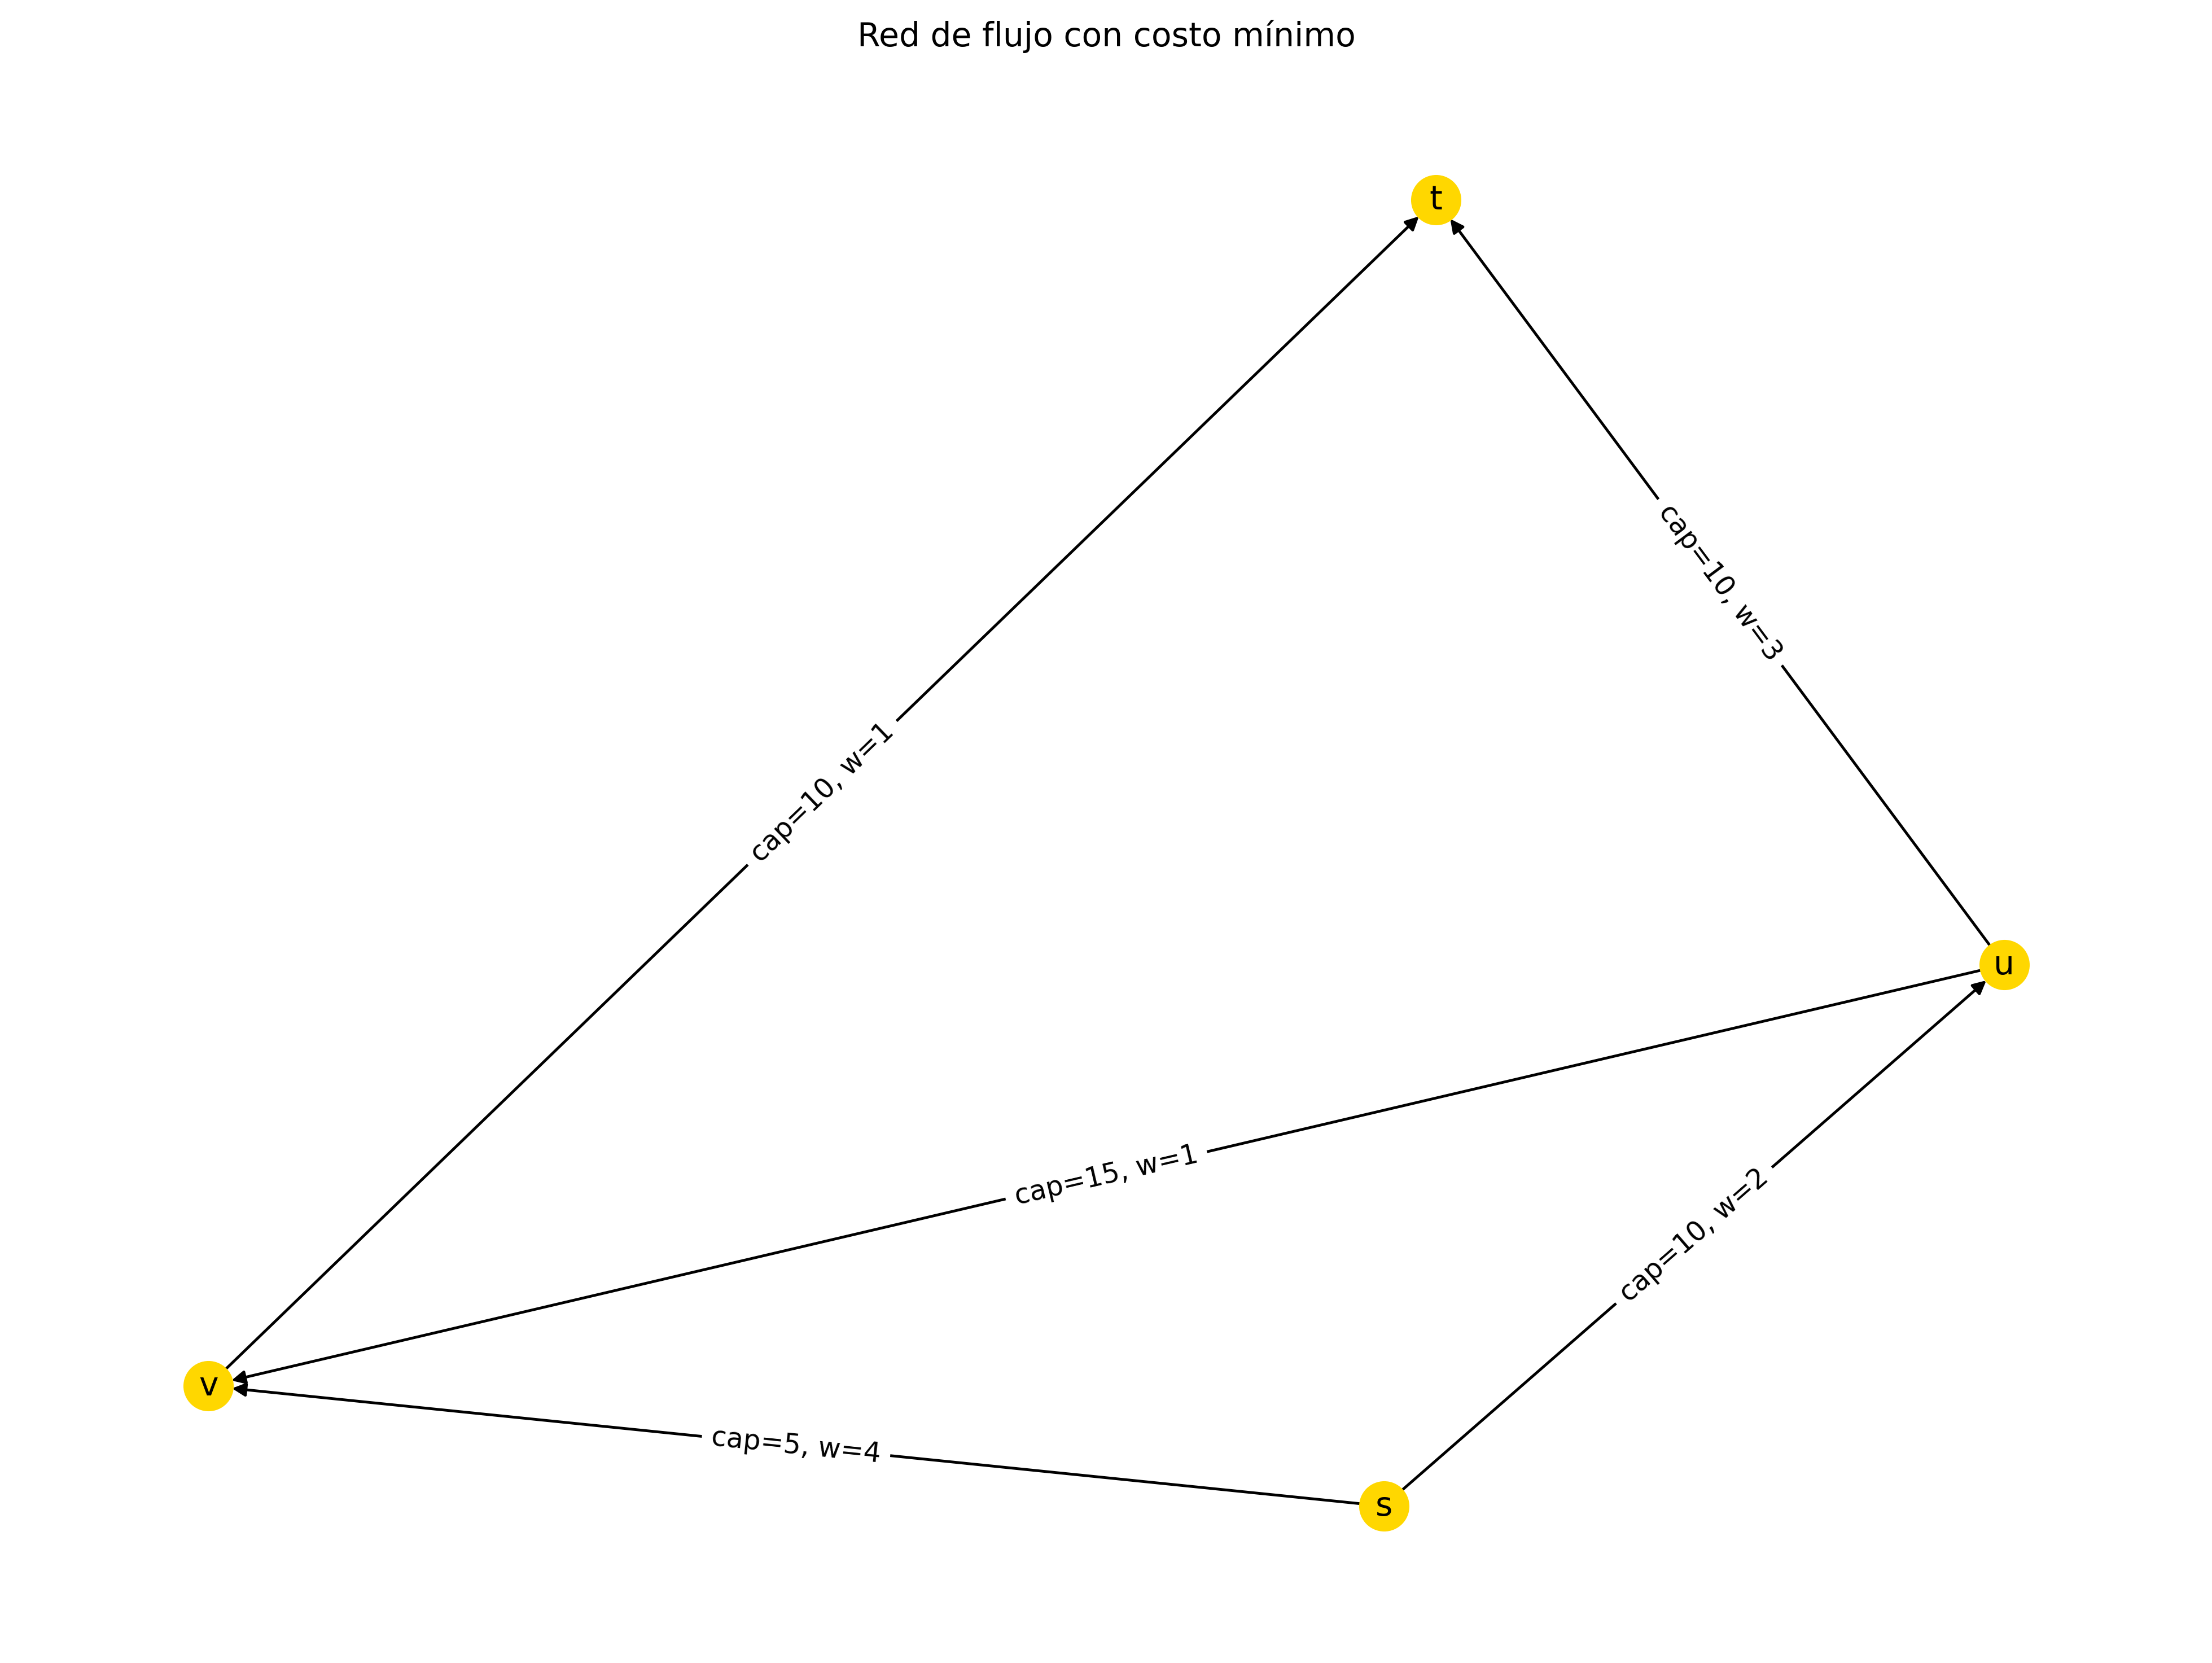

In [ ]:
capacidad = {
    (0, 1): 15, (0, 2): 10,   # CDMX->Monterrey, CDMX->Chihuahua
    (1, 3): 12, (2, 1): 5,
    (2, 4): 10, (3, 2): 7,
    (3, 4): 20
}

def ford_fulkerson(fuente, sumidero):
    flujo = 0
    # Creamos grafo residual
    residual = dict(capacidad)

    def dfs(u, t, f, visitados):
        if u == t:
            return f
        visitados.add(u)
        for v in range(len(ciudades)):
            if (u, v) in residual and residual[(u, v)] > 0 and v not in visitados:
                minimo = dfs(v, t, min(f, residual[(u, v)]), visitados)
                if minimo > 0:
                    residual[(u, v)] -= minimo
                    residual[(v, u)] = residual.get((v, u), 0) + minimo
                    return minimo
        return 0

    while True:
        visitados = set()
        aumento = dfs(fuente, sumidero, float("inf"), visitados)
        if aumento == 0:
            break
        flujo += aumento
    return flujo

fuente, sumidero = 0, 4  # CDMX -> Acapulco
max_flujo = ford_fulkerson(fuente, sumidero)
print(f"Flujo máximo de {ciudades[fuente]} a {ciudades[sumidero]}: {max_flujo}")

F = nx.DiGraph()
F.add_edge("s", "u", capacity=10, weight=2)
F.add_edge("s", "v", capacity=5, weight=4)
F.add_edge("u", "v", capacity=15, weight=1)
F.add_edge("u", "t", capacity=10, weight=3)
F.add_edge("v", "t", capacity=10, weight=1)

flow_dict = nx.min_cost_flow(F)
flow_value = sum(flow_dict["s"].values())
flow_cost = nx.cost_of_flow(F, flow_dict)
print("Flujo total enviado:", flow_value)
print("Costo total mínimo:", flow_cost)

# Dibujar grafo con capacidades
pos = nx.spring_layout(F, seed=42)
plt.figure(figsize=(11,8),dpi=350)
nx.draw(F, pos, with_labels=True, node_color="gold")
edge_labels = {(u,v): f"cap={d['capacity']}, w={d['weight']}" for u,v,d in F.edges(data=True)}
nx.draw_networkx_edge_labels(F, pos, edge_labels=edge_labels)
plt.title("Red de flujo con costo mínimo")
plt.show()
